In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from stl import mesh
import pandas as pd

from scipy.spatial import Delaunay
from skimage import measure


In [2]:

def numpy_to_stl(vertices, faces, filename):
    """
    Convierte un arreglo de NumPy a un archivo STL.
    
    :param vertices: Un arreglo de NumPy con las coordenadas de los vértices.
    :param faces: Un arreglo de NumPy con los índices de los vértices que forman las caras.
    :param filename: El nombre del archivo STL a crear.
    """
    # Crear la malla
    mesh_data = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))

    for i, face in enumerate(faces):
        for j in range(3):
            mesh_data.vectors[i][j] = vertices[face[j], :]

    # Guardar el archivo STL
    mesh_data.save(filename)

# Ejemplo de uso:
# Define los vértices de un prisma rectangular
vertices = np.array([
    [0.0, 0.0, 0.0],  # Vértice 0
    [1.0, 0.0, 0.0],  # Vértice 1
    [1.0, 1.0, 0.0],  # Vértice 2
    [0.0, 1.0, 0.0],  # Vértice 3
    [0.0, 0.0, 1.0],  # Vértice 4
    [1.0, 0.0, 1.0],  # Vértice 5
    [1.0, 1.0, 1.0],  # Vértice 6
    [0.0, 1.0, 1.0]   # Vértice 7
])

# Define las caras del prisma (cada cara se define por 2 triángulos)
faces = np.array([
    [0, 1, 2], [0, 2, 3],  # Cara inferior
    [4, 5, 6], [4, 6, 7],  # Cara superior
    [0, 1, 5], [0, 5, 4],  # Cara frontal
    [1, 2, 6], [1, 6, 5],  # Cara derecha
    [2, 3, 7], [2, 7, 6],  # Cara trasera
    [3, 0, 4], [3, 4, 7]   # Cara izquierda
])

# Llama a la función
numpy_to_stl(vertices, faces, 'prisma.stl')

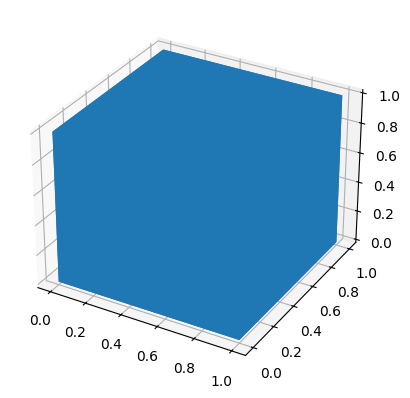

In [3]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

# Create a new plot
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('prisma.stl')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

In [4]:
np.array(your_mesh)

array([[0., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 1., 0., 1., 1., 1.],
       [1., 0., 0., 1., 1., 1., 1., 0., 1.],
       [1., 1., 0., 0., 1., 0., 0., 1., 1.],
       [1., 1., 0., 0., 1., 1., 1., 1., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 1., 1.]], dtype=float32)

In [5]:



def numpy_to_stl(vertices, faces, filename):
    """
    Convierte un arreglo de NumPy a un archivo STL.
    
    :param vertices: Un arreglo de NumPy con las coordenadas de los vértices.
    :param faces: Un arreglo de NumPy con los índices de los vértices que forman las caras.
    :param filename: El nombre del archivo STL a crear.
    """
    # Crear la malla
    mesh_data = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))

    for i, face in enumerate(faces):
        for j in range(3):
            mesh_data.vectors[i][j] = vertices[face[j], :]

    # Guardar el archivo STL
    mesh_data.save(filename)

# Vértices del dodecaedro
phi = (1 + np.sqrt(5)) / 2  # Número áureo
vertices = np.array([
    [-1, -1, -1],
    [-1, -1,  1],
    [-1,  1, -1],
    [-1,  1,  1],
    [ 1, -1, -1],
    [ 1, -1,  1],
    [ 1,  1, -1],
    [ 1,  1,  1],
    [ 0, -1/phi, -phi],
    [ 0, -1/phi,  phi],
    [ 0,  1/phi, -phi],
    [ 0,  1/phi,  phi],
    [-1/phi, -phi,  0],
    [-1/phi,  phi,  0],
    [ 1/phi, -phi,  0],
    [ 1/phi,  phi,  0],
    [-phi,  0, -1/phi],
    [ phi,  0, -1/phi],
    [-phi,  0,  1/phi],
    [ phi,  0,  1/phi]
])

# Caras del dodecaedro (cada cara se define por 3 triángulos)
faces = np.array([
    [0, 8, 4], [0, 4, 14], [0, 14, 12], [0, 12, 16], [0, 16, 8],
    [1, 9, 5], [1, 5, 15], [1, 15, 13], [1, 13, 17], [1, 17, 9],
    [2, 10, 6], [2, 6, 18], [2, 18, 12], [2, 12, 16], [2, 16, 10],
    [3, 11, 7], [3, 7, 19], [3, 19, 13], [3, 13, 17], [3, 17, 11],
    [4, 8, 14], [5, 9, 15], [6, 10, 18], [7, 11, 19],
    [8, 16, 12], [9, 17, 13], [10, 16, 12], [11, 17, 13],
    [14, 4, 8], [15, 5, 9], [18, 6, 10], [19, 7, 11]
])

# Llama a la función
numpy_to_stl(vertices, faces, 'dodecaedro.stl')

In [7]:
a = plt.imread("imagenesRuben/test2.png")

In [8]:
a = a > 0.5

In [9]:
a.shape

(60, 155, 4)

In [145]:

def array_to_stl_marching_cubes(array_3d, filename):
    """
    Convierte un arreglo 3D a un archivo STL utilizando el algoritmo de Marching Cubes.
    
    :param array_3d: Un arreglo 3D de NumPy donde los valores de 1 representan objetos sólidos y los valores de 0 representan vacío.
    :param filename: El nombre del archivo STL a crear.
    """
    # Aplicar el algoritmo de Marching Cubes para obtener la malla
    verts, faces, _, _ = measure.marching_cubes(array_3d, level=0.5)
    
    # Crear la malla
    mesh_data = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
    
    for i, face in enumerate(faces):
        for j in range(3):
            mesh_data.vectors[i][j] = verts[face[j], :]
    
    # Guardar el archivo STL
    mesh_data.save(filename)



def array_to_stl(array_3d, filename):
    """
    Convierte un arreglo 3D a un archivo STL.
    
    :param array_3d: Un arreglo 3D de NumPy donde los valores de 1 representan objetos sólidos y los valores de 0 representan vacío.
    :param filename: El nombre del archivo STL a crear.
    """
    # Extraer las coordenadas de los puntos sólidos
    points = np.argwhere(array_3d == 1)
    
    # Generar la triangulación Delaunay a partir de los puntos sólidos
    if len(points) < 4:
        raise ValueError("No hay suficientes puntos para generar una malla.")
    
    tri = Delaunay(points)
    
    # Crear la malla
    mesh_data = mesh.Mesh(np.zeros(tri.simplices.shape[0], dtype=mesh.Mesh.dtype))
    
    for i, simplex in enumerate(tri.simplices):
        for j in range(3):
            mesh_data.vectors[i][j] = points[simplex[j], :]
    
    # Guardar el archivo STL
    mesh_data.save(filename)

# Ejemplo de uso:
# Crear un arreglo 3D donde los valores de 1 representan objetos sólidos
array_3d = np.zeros((50, 50, 50))
array_3d[10:40, 10:40, 10:40] = 1  # Crear un cubo sólido en el centro

# Llama a la función
array_to_stl(array_3d, 'solido.stl')

array_3d = np.zeros((50, 50, 50))
array_3d[10:40, 10:40, 10:40] = 1  # Crear un cubo sólido en el centro

array_to_stl_marching_cubes(array_3d, 'solido_mejorado.stl')

NameError: name 'Delaunay' is not defined

In [3]:
import iberoSignalPro.imagen as bim

In [143]:
import numpy as np
from skimage import measure
from stl import mesh

def gaussian(x, mu=0, sigma=200):
    return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

def array_to_stl_marching_cubes(array, filename):
    # Determine a valid level within the range of the array
    level = (array.min() + array.max()) / 2
    
    # Use marching cubes to obtain the surface mesh of the 3D array
    verts, faces, _, _ = measure.marching_cubes(array, level=level)
    
    # Create the mesh
    gauss_mesh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
    for i, f in enumerate(faces):
        for j in range(3):
            gauss_mesh.vectors[i][j] = verts[f[j], :]
    
    # Write the mesh to file
    gauss_mesh.save(filename)

# Generate x, y, z values
x = np.linspace(-50, 50, 100)
y = np.linspace(-50, 50, 100)
z = np.linspace(-50, 50, 100)

# Normalize x, y, z values
x = (x - np.min(x)) / (np.max(x) - np.min(x))
y = (y - np.min(y)) / (np.max(y) - np.min(y))
z = (z - np.min(z)) / (np.max(z) - np.min(z))


X, Y, Z = np.meshgrid(x, y, z)

gaussian_3d = gaussian(X) * gaussian(Y) * gaussian(Z)

array_3d = np.array(gaussian_3d)

array_to_stl_marching_cubes(array_3d, 'gauss.stl')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob
import pydicom
import pylab as pl
import sys
import matplotlib.path as mplPath


In [232]:
plots = []
for f in glob.glob("C:/Users/moralesf/Downloads/Subject (1)/Subject (1)/98.12.2/*.dcm"):
    pass
    filename = f
    print(filename)
    ds = pydicom.dcmread(filename)
    pix = ds.pixel_array
    pix = pix*1+(-1024)
    plots.append(pix)

y = np.dstack(plots)
y = np.array(y)

C:/Users/moralesf/Downloads/Subject (1)/Subject (1)/98.12.2\56364397.dcm
C:/Users/moralesf/Downloads/Subject (1)/Subject (1)/98.12.2\56364398.dcm
C:/Users/moralesf/Downloads/Subject (1)/Subject (1)/98.12.2\56364399.dcm
C:/Users/moralesf/Downloads/Subject (1)/Subject (1)/98.12.2\56364400.dcm
C:/Users/moralesf/Downloads/Subject (1)/Subject (1)/98.12.2\56364401.dcm
C:/Users/moralesf/Downloads/Subject (1)/Subject (1)/98.12.2\56364402.dcm
C:/Users/moralesf/Downloads/Subject (1)/Subject (1)/98.12.2\56364403.dcm
C:/Users/moralesf/Downloads/Subject (1)/Subject (1)/98.12.2\56364404.dcm
C:/Users/moralesf/Downloads/Subject (1)/Subject (1)/98.12.2\56364405.dcm
C:/Users/moralesf/Downloads/Subject (1)/Subject (1)/98.12.2\56364406.dcm
C:/Users/moralesf/Downloads/Subject (1)/Subject (1)/98.12.2\56364407.dcm
C:/Users/moralesf/Downloads/Subject (1)/Subject (1)/98.12.2\56364408.dcm
C:/Users/moralesf/Downloads/Subject (1)/Subject (1)/98.12.2\56364409.dcm
C:/Users/moralesf/Downloads/Subject (1)/Subject (1)

In [233]:
import iberoSignalPro.imagen as bim

In [234]:
y.shape

(512, 512, 427)

In [259]:
import numpy as np
from scipy.ndimage import zoom




(300, 300, 300)


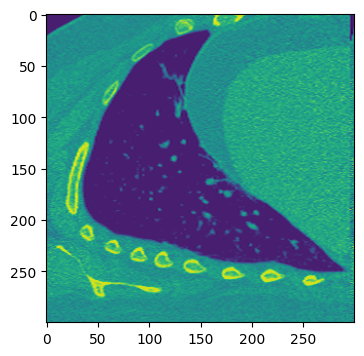

In [269]:
plt.imshow(output[:,50,:])

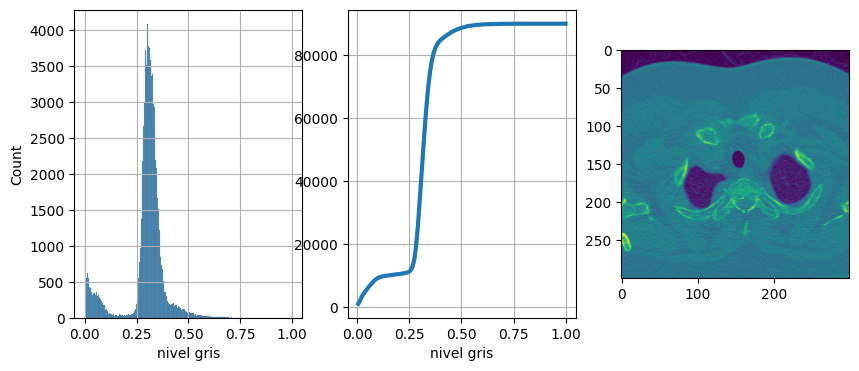

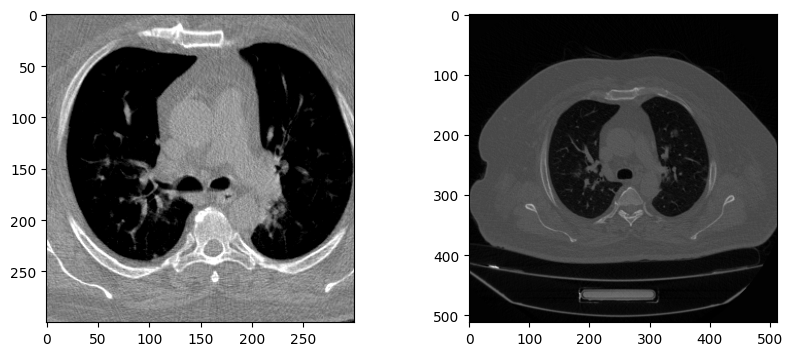

In [270]:
output = bim.normalize_image(y[100:400,106:-106,180:350])

bim.explain_histogram(output[:,:,4]) 
output = bim.equalize_image(output, 0.1, 0.5)
bim.show_two_normalized(output[:,:,50], y[:, :,50])

In [271]:
zoom_factors = (1, 1, 300 / 170)
output = zoom(output, zoom_factors, order=3)  # Using cubic interpolation (order=3)
print(output.shape)

(300, 300, 300)


In [272]:
output.shape

(300, 300, 300)

300 300


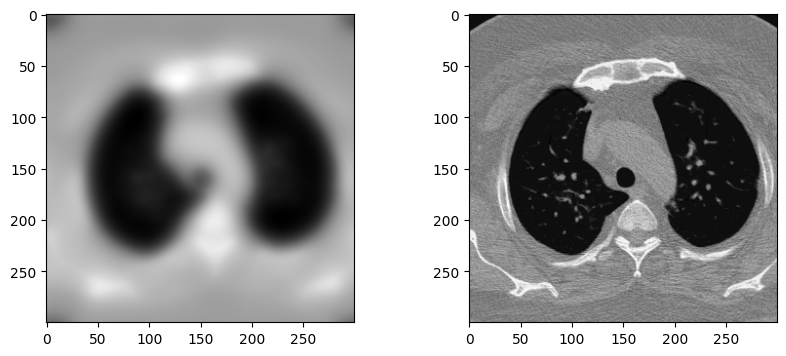

In [305]:
N, M =output[:,:,1].shape
print(N, M)

# Se crean las coordenadas del kernel.
# Se debe de usar para esta aplicación la mitad de la longitud de la imágen
# La imágen debe de ser una imágen cuadrada 
Coord = bim.Coords_Kernel((N-1)/2)

#                   Kernel  ws  N   tipo = ["lp", "hp"]   
#                      |     |  |     |
#                      v     v  v     v
LPfilter = bim.butter(Coord, 5, 5, 'lp')

# Se le aplica el filtro a la imagen
#                  Imagen Filtro
#                   |      |
#                   v      v
filtlp = bim.imfilt(output[:,:,50], LPfilter)

#HPfilter = bim.butter(Coord, 13, 2, 'hp')
#filthp = bim.imfilt(output[:,:,50], HPfilter)
bim.show_two_normalized(filtlp, output[:,:,50])

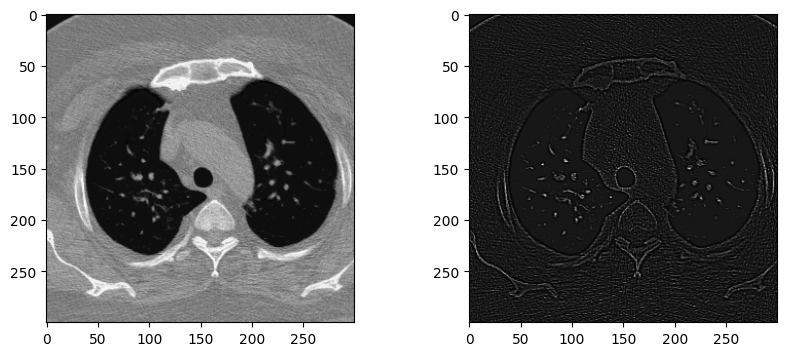

In [306]:
hb = bim.highboost(8, 'dir')
Image = bim.conv2d(output[:,:,50], hb)
bim.show_two_normalized(output[:,:,50], Image**3)

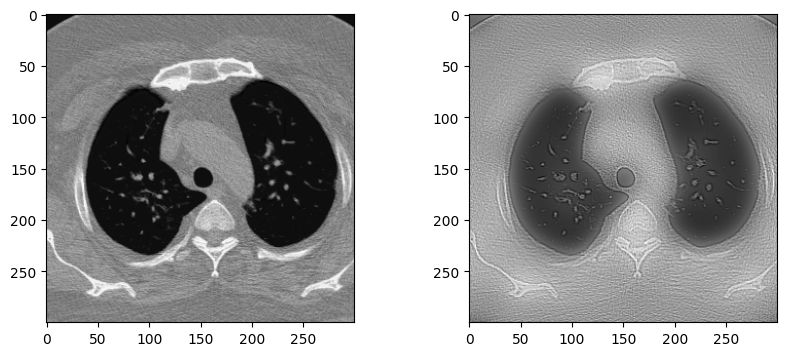

In [308]:
bim.show_two_normalized(output[:,:,50], bim.normalize_image(filtlp) + bim.normalize_image(Image))
filer = bim.normalize_image(filtlp) + bim.normalize_image(Image)
filer = bim.normalize_image(filer)

filer = filtlp

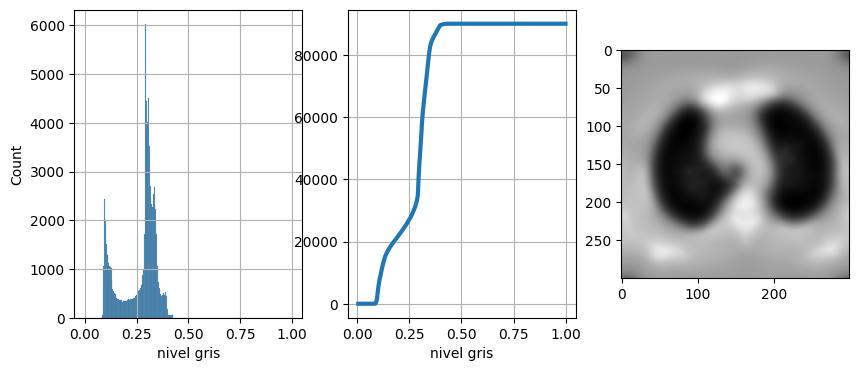

In [309]:
bim.explain_histogram(filer, "gray")

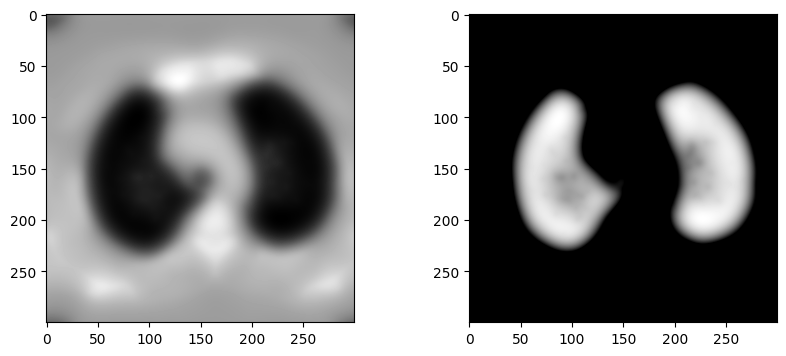

In [339]:
eq = bim.equalize_image(filer, 0.05, 0.2)
eq = bim.normalize_image(-eq)
bim.show_two_normalized(filer, eq)

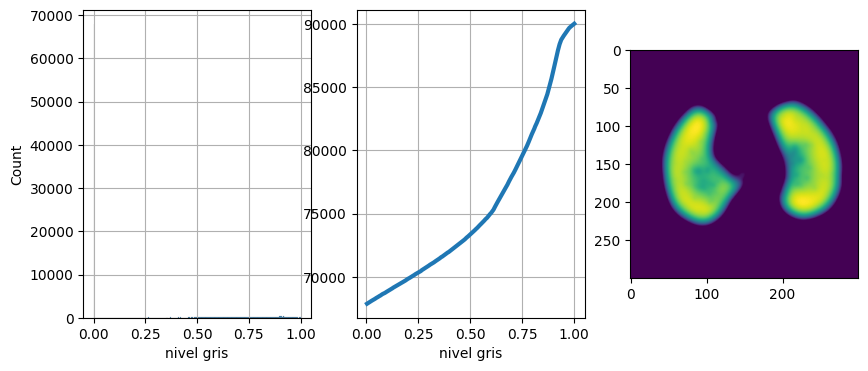

In [340]:
bim.explain_histogram(eq)

In [341]:
thresh = bim.thresh_mask(eq, 0.0, 1) 

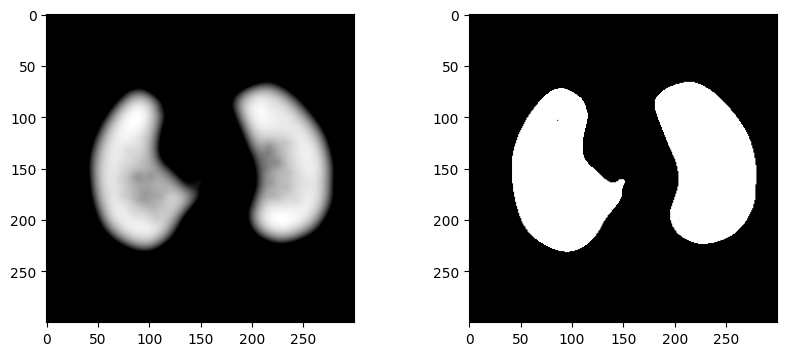

In [342]:
bim.show_two_normalized(eq, thresh)

In [281]:
import cv2

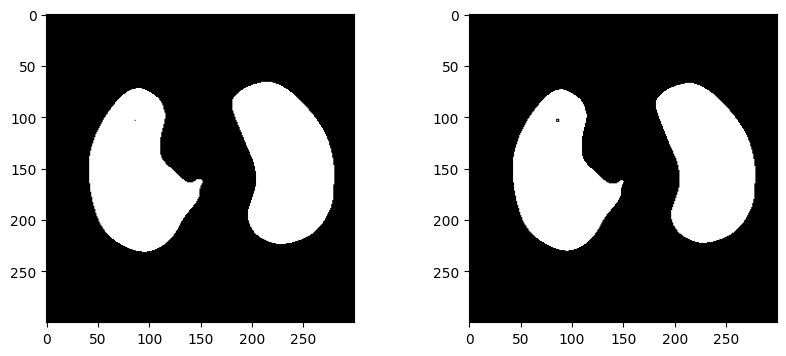

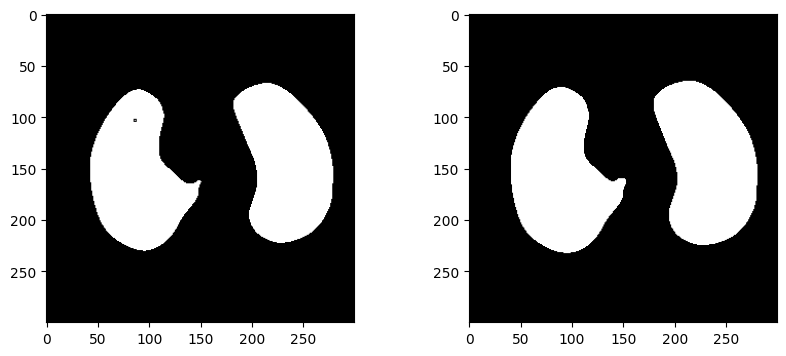

In [343]:
kernel = np.array(bim.KernelCirc(3), dtype=np.uint8)
eroded = cv2.erode(thresh, kernel, iterations=1)
bim.show_two_normalized(thresh, eroded)
dilated = cv2.dilate(thresh, kernel, iterations=1)
bim.show_two_normalized(eroded, dilated)
dilated = bim.normalize_image(dilated)

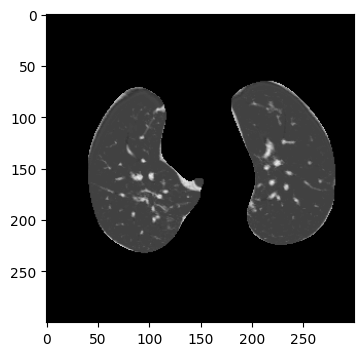

In [418]:
plt.imshow(dilated * output[:,:,50], cmap='gray')

In [419]:
def pipeline(input):
    filtlp = bim.imfilt(input, LPfilter)
    Image = bim.conv2d(input, hb)
    #filer = bim.normalize_image(filtlp) + bim.normalize_image(Image**4)
    filer = bim.normalize_image(filtlp)
    eq = bim.equalize_image(filer, 0, 0.5)
    eq = bim.normalize_image(eq)
    thresh = bim.thresh_mask(eq, 0.0, 0.7)
    eroded = cv2.erode(thresh, kernel, iterations=2)
    dilated = cv2.dilate(eroded, kernel, iterations=2)
    dilated = bim.normalize_image(dilated)
    output = bim.normalize_image(filer * input)
    return dilated

In [420]:
new_image = np.zeros_like(output)
for i in range(0, output.shape[2]):
    new_image[:, :, i] = pipeline(output[:,:,i])

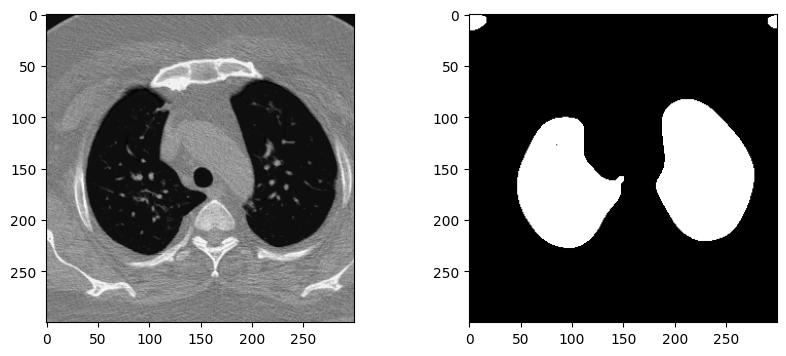

In [421]:
bim.show_two_normalized(output[:,:,50], new_image[:,:,40])

In [422]:
array_to_stl_marching_cubes(new_image[:,:,::-1], 'x.stl')

In [423]:
new_image_Y = np.zeros_like(output)
for i in range(0, output.shape[2]):
    new_image_Y[:, i, :] = pipeline(output[:,i,:])

In [424]:
array_to_stl_marching_cubes(new_image_Y[:,:,::-1], 'y.stl')

In [425]:
new_image_Z = np.zeros_like(output)
for i in range(0, output.shape[2]):
    new_image_Z[i, :, :] = pipeline(output[i,:,:])

In [426]:
array_to_stl_marching_cubes(new_image_Z[:,:,::-1], 'z.stl')

In [427]:
final = new_image * new_image_Y * new_image_Z

In [428]:
array_to_stl_marching_cubes(final[:,:,::-1], 'xyz.stl')